# Single Aspect Modelling

In [77]:
'''
Import required packages and libraries for multi-aspect modelling
'''
import joblib
import numpy as np
from sklearn.model_selection import train_test_split

In [78]:
PATH = "../cleaning/single_aspect.pkl"

data    = joblib.load(PATH)
matrix  = data["matrix"]
columns = data["columns"]

In [79]:
first_row_coo = matrix[0].tocoo()
for i, v in zip(first_row_coo.col, first_row_coo.data):
    print(f"Column: {columns[i]}, Value: {v}, Column Index: {i}")

Column: Score, Value: 1.0, Column Index: 1


## Training Testing Split

In [80]:
# Target variable we are trying to predict
target_col = columns.index("Score")

x = matrix[:, [i for i in range(matrix.shape[1]) if i != target_col]]   # Remove target variable from sparse matrix
y = matrix[:,columns.index("Score")].toarray().ravel() - 1              # Target variable extracted from sparse matrix

In [81]:
# Check dimensions of model inputs and labels
print(matrix.shape)
print(x.shape)
print(type(y))
print(np.shape(y))

(104247, 35515)
(104247, 35514)
<class 'numpy.ndarray'>
(104247,)


In [82]:
x_train, x_test, y_train, y_test = train_test_split(
    x,              # Sparse matrix
    y,              # Target column
    test_size=0.2,  # 20% test split
    random_state=42
)

## Neural Network Regressor

In [83]:
import tensorflow as tf
from scipy.sparse import csr_matrix, hstack
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MeanSquaredError

In [84]:
input_dim   = x.shape[1]

n_neurons_1 = 70
n_neurons_2 = 70
n_neurons_3 = 70

output_dim  = 1

epoch_no    = 100
batch_size  = 512

In [85]:
# Define generator for training data
def train_generator():
    for i in range(x_train.shape[0]):
        yield x_train[i].toarray()[0].astype(np.float32), y_train[i]

# Define generator for testing data
def test_generator():
    for i in range(x_test.shape[0]):
        yield x_test[i].toarray()[0].astype(np.float32), y_test[i]

In [86]:
# TensorFlow Datasets from generators
train_dataset = tf.data.Dataset.from_generator(
    train_generator,
    output_signature=(
        tf.TensorSpec(shape=(x_train.shape[1],), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int64),
    )
).batch(batch_size).prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_generator(
    test_generator,
    output_signature=(
        tf.TensorSpec(shape=(x_test.shape[1],), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int64),
    )
).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [87]:
# Add layers and activation function to neural network
nn_reg    = tf.keras.Sequential()

nn_reg.add(Input(shape=(input_dim,)))
nn_reg.add(Dense(n_neurons_1, activation='relu'))
nn_reg.add(Dense(n_neurons_2, activation='relu'))
nn_reg.add(Dense(n_neurons_3, activation='relu'))
nn_reg.add(Dense(output_dim, activation='linear'))

# Configure loss function, gradient descent, and evaluation metrics
nn_reg.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=MeanSquaredError(),
    metrics=["mae"]
)

In [88]:
reg_loss = nn_reg.fit(train_dataset, epochs=epoch_no)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 283ms/step - loss: 409.9639 - mae: 9.4995
Epoch 2/100


c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


163/163 ━━━━━━━━━━━━━━━━━━━━ 48s 291ms/step - loss: 6.9432 - mae: 2.0497
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 273ms/step - loss: 4.6293 - mae: 1.7820
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 281ms/step - loss: 3.4844 - mae: 1.5717
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 47s 290ms/step - loss: 3.1420 - mae: 1.4870
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 282ms/step - loss: 3.8720 - mae: 1.5415
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 45s 279ms/step - loss: 2.8027 - mae: 1.4099
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - loss: 2.4213 - mae: 1.3030
Epoch 9/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 268ms/step - loss: 2.6398 - mae: 1.3555
Epoch 10/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 50s 308ms/step - loss: 5.4890 - mae: 1.7764
Epoch 11/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 58s 354ms/step - loss: 2.2397 - mae: 1.2316
Epoch 12/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 280ms/step - loss: 4.2556 - mae: 1.6274
Epoch 13/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 46s 280ms/step - loss: 3.4661 - 

In [89]:
input_dim   = x.shape[1]

n_neurons_1 = 70
n_neurons_2 = 70
n_neurons_3 = 70

output_dim  = 5

epoch_no    = 100
batch_size  = 512

In [90]:
# Add layers and activation function to neural network
nn_class    = tf.keras.Sequential()

nn_class.add(Input(shape=(input_dim,)))
nn_class.add(Dense(n_neurons_1, activation='relu'))
nn_class.add(Dense(n_neurons_2, activation='relu'))
nn_class.add(Dense(n_neurons_3, activation='relu'))
nn_class.add(Dense(output_dim, activation='softmax'))

# Configure loss function, gradient descent, and evaluation metrics
nn_class.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

In [91]:
history = nn_class.fit(train_dataset, epochs=epoch_no)

Epoch 1/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 572ms/step - accuracy: 0.4652 - loss: 14.0196
Epoch 2/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 568ms/step - accuracy: 0.5187 - loss: 5.2061
Epoch 3/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 585ms/step - accuracy: 0.5434 - loss: 2.8170
Epoch 4/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 588ms/step - accuracy: 0.6063 - loss: 1.9340
Epoch 5/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 582ms/step - accuracy: 0.6061 - loss: 1.6894
Epoch 6/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 598ms/step - accuracy: 0.6490 - loss: 1.2917
Epoch 7/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 596ms/step - accuracy: 0.6381 - loss: 1.3422
Epoch 8/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 600ms/step - accuracy: 0.6157 - loss: 1.3680
Epoch 9/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 583ms/step - accuracy: 0.6608 - loss: 1.1435
Epoch 10/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 591ms/step - accuracy: 0.6615 - loss: 1.1318
Epoch 11/100
163/163 ━━━━━━━━━━━━━━━━━━━━ 98s 604ms/step - accuracy: 0.6614 - loss: 1.1266
Epoch 1

## Modelling

In [92]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

 40/652 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step

652/652 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step
1.867609272752141


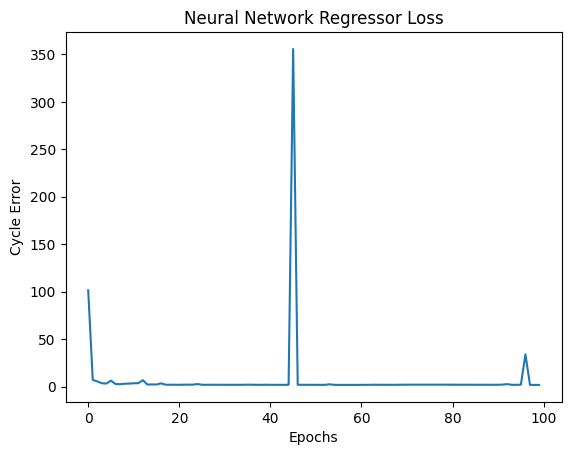

In [93]:
# Neural Network Regression MSE
nn_pred = nn_reg.predict(x_test)
print(mean_squared_error(y_true=y_test, y_pred=nn_pred))

plt.plot(reg_loss.history['loss'])
plt.title("Neural Network Regressor Loss")
plt.xlabel("Epochs")
plt.ylabel("Cycle Error")
plt.show()

In [94]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # You can tune alpha later
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

aspect_names = columns  # or provide aspect column names directly
coefficients = ridge.coef_

# Get top contributing aspects
top_positive = sorted(zip(coefficients, aspect_names), reverse=True)[:10]
top_negative = sorted(zip(coefficients, aspect_names))[:10]

print("Top Positive Aspects:")
for coef, name in top_positive:
    print(f"{name}: {coef:.4f}")

print("\nTop Negative Aspects:")
for coef, name in top_negative:
    print(f"{name}: {coef:.4f}")

aspect_map = dict(zip(columns, coefficients))
for key, value in aspect_map.items():
    print(key, value)

MSE: 1.8369
Top Positive Aspects:
stella: 0.6505
wax lip: 0.5613
extra virgin oil: 0.5585
cloth: 0.5412
fb: 0.5218
chardonnay: 0.5185
molassis flavor: 0.5167
bean puree: 0.4980
iphone: 0.4963
glass ball: 0.4803

Top Negative Aspects:
cupcake frosting: -1.5892
banana yogurt: -1.5159
engine: -1.3183
macaroni cheese: -1.2761
chinese roast: -1.2754
liqueur candy: -1.2748
price wt value: -1.2746
msg sodium: -1.2737
cracklin: -1.2318
rice miso soup: -1.2005
ProductId 3.2465882081601423e-07
Score 0.0
1000 island dressing 0.0
12 0.19490295699368967
12 bottle 20 0.11050495791551807
12 ounce 0.0
12 oz package 0.0
14 0.0
16 cup sampler 0.0
16 ounce bottle 0.0
16 oz chili powder 0.0
24 0.0
32 0.0
32 fluid oz container 0.0
32 ounce bottle 0.0
32 ounce container 0.19405505297964148
32 oz 0.0
3d style 0.0
3s -0.35162519695282934
40 pouch 0.0
5 oz 0.0
60 0.1102513737459855
64 oz bottle 0.0
7 oz 0.11014463276598009
7up 0.0
98 br 98 0.0
PRON 0.0
aaa aaa 0.23917995912466833
abalone 0.0
abba 0.23868345029

In [95]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")

importances = rf.feature_importances_
sorted_idx = importances.argsort()[::-1]

print("Top Contributing Aspects:")
for idx in sorted_idx[:10]:
    print(f"{aspect_names[idx]}: {importances[idx]:.4f}")

MSE: 2.2704
Top Contributing Aspects:
ProductId: 0.5830
tast: 0.0054
flavoniod content: 0.0052
coffe taste: 0.0048
tchibo coffee: 0.0037
prezzo: 0.0036
shippin price: 0.0030
suey: 0.0030
foo foo coffee: 0.0029
smucker caramel syrup: 0.0026


652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
              precision    recall  f1-score   support

         0.0       0.31      0.00      0.00      1999
         1.0       0.00      0.00      0.00      1126
         2.0       1.00      0.00      0.00      1415
         3.0       0.08      0.00      0.00      2738
         4.0       0.65      1.00      0.79     13572

    accuracy                           0.65     20850
   macro avg       0.41      0.20      0.16     20850
weighted avg       0.53      0.65      0.51     20850



c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


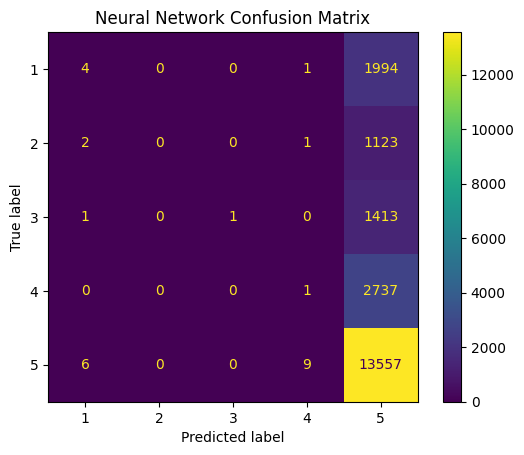

In [96]:
nn_pred = nn_class.predict(x_test)
nn_pred = [np.argmax(arr) for arr in nn_pred]
print(classification_report(y_true=y_test, y_pred=nn_pred))

cm = confusion_matrix(y_true=y_test, y_pred=nn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1", "2", "3", "4", "5"])

disp.plot()
plt.title("Neural Network Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

         0.0       0.17      0.11      0.13      1999
         1.0       0.05      0.02      0.03      1126
         2.0       0.06      0.02      0.03      1415
         3.0       0.14      0.08      0.10      2738
         4.0       0.66      0.83      0.74     13572

    accuracy                           0.57     20850
   macro avg       0.22      0.21      0.21     20850
weighted avg       0.47      0.57      0.51     20850



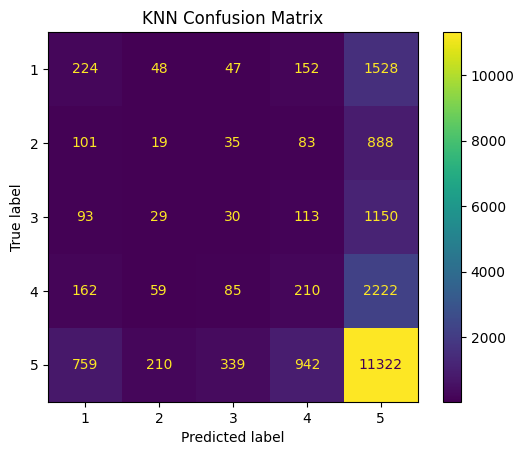

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
print(classification_report(y_pred=knn_pred, y_true=y_test))

cm = confusion_matrix(y_true=y_test, y_pred=knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1", "2", "3", "4", "5"])

disp.plot()
plt.title("KNN Confusion Matrix")
plt.show()

              precision    recall  f1-score   support

         0.0       0.12      0.10      0.11      1999
         1.0       0.05      0.04      0.04      1126
         2.0       0.08      0.07      0.07      1415
         3.0       0.15      0.13      0.14      2738
         4.0       0.66      0.71      0.68     13572

    accuracy                           0.50     20850
   macro avg       0.21      0.21      0.21     20850
weighted avg       0.47      0.50      0.48     20850



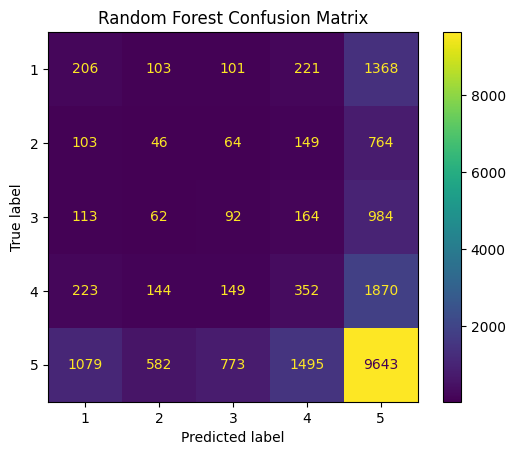

In [98]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(classification_report(y_pred=rf_pred, y_true=y_test))

cm = confusion_matrix(y_true=y_test, y_pred=rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["1", "2", "3", "4", "5"])

disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()